## Importing Libraries

In [42]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

## Importing Chi-Chi Earthquake Dataset

In [43]:
df = pd.read_excel("Datasets/Chi-Chi Earthquake.xlsx")

## Data Pre-processing

In [44]:
df.sample(5)

,(N1)60,CSR,PGA,Liq
120,9.57,0.143,0.211,Yes
206,16.11,0.135,0.124,No
284,25.30,0.322,0.420,No
267,7.11,0.095,0.181,No
51,2.39,0.130,0.124,Yes


In [45]:
df['Liq'] = pd.get_dummies(df['Liq'], drop_first = True)

In [46]:
df.describe()

,(N1)60,CSR,PGA,Liq
count,288.000000,288.000000,288.000000,288.000000
mean,12.764271,0.246368,0.273497,0.569444
std,7.605458,0.169816,0.207849,0.496016
min,0.930000,0.041000,0.055000,0.000000
25%,7.092500,0.130000,0.124000,0.000000
50%,10.795000,0.177500,0.211000,1.000000
75%,18.177500,0.326250,0.420000,1.000000
max,49.290000,0.822000,1.000000,1.000000


In [47]:
df.Liq.value_counts()

1    164
0    124
Name: Liq, dtype: int64

In [62]:
df.sample(5)

,(N1)60,CSR,PGA,Liq
229,20.42,0.122,0.124,0
36,11.88,0.209,0.165,1
178,17.27,0.126,0.124,0
48,7.27,0.126,0.124,1
272,35.34,0.384,0.420,0


In [50]:
#First model uses the two features (N1)60 and PGA, while the second one uses (N1)60 and CSR
#features = df[['(N1)60','CSR']]
features = df[['(N1)60','PGA']]
target = df['Liq']

In [51]:
def MinMaxNormalization(data):
    # MinMax Normalization
    scaler = MinMaxScaler()
    # fit scaler on data
    scaler.fit(data)
    # apply transform
    minmax_normalized = scaler.transform(data)
    return minmax_normalized

## Using Pre-trained model

In [52]:
#Data normalization
normalized_features = MinMaxNormalization(features)

In [53]:
#Splitting the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size = 0.8)

In [54]:
#Loading the previously saved model.
pre_trained_model = tf.keras.models.load_model('main_model.h5')
pre_trained_model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8596
Epoch 2/500
2/2 [==============================] - 0s 998us/step - loss: 0.3662 - accuracy: 0.8596
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3655 - accuracy: 0.8596
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8596
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8596
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8596
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8596
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8596
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8596
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8596
Epoch 11/500
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8421
Epoch 167/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8421
Epoch 168/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8421
Epoch 169/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8421
Epoch 170/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3352 - accuracy: 0.8421
Epoch 171/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8421
Epoch 172/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8421
Epoch 173/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8421
Epoch 174/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8421
Epoch 175/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8421
Epoch 176/500
2/2 [=====

2/2 [==============================] - 0s 998us/step - loss: 0.3250 - accuracy: 0.8596
Epoch 331/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8596
Epoch 332/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8596
Epoch 333/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8596
Epoch 334/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3248 - accuracy: 0.8596
Epoch 335/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8596
Epoch 336/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8596
Epoch 337/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3247 - accuracy: 0.8596
Epoch 338/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3246 - accuracy: 0.8596
Epoch 339/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3246 - accuracy: 0.8596
Epoch 340/500
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8596
Epoch 495/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8596
Epoch 496/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8596
Epoch 497/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8596
Epoch 498/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8596
Epoch 499/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3189 - accuracy: 0.8596
Epoch 500/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8596


In [55]:
test_loss, test_accuracy = pre_trained_model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 858us/step - loss: 0.3625 - accuracy: 0.8571


In [56]:
y_predictions = pre_trained_model.predict(X_test)

In [57]:
for i in range(len(y_predictions)):
    if y_predictions[i] < 0.5:
        y_predictions[i] = 0
    else:
        y_predictions[i] = 1

In [58]:
print("ACCURACY = ",accuracy_score(y_test, y_predictions))
print("RECALL = ",recall_score(y_test, y_predictions))
print("PRECISION = ",precision_score(y_test, y_predictions))
print("F1-Score = ",f1_score(y_test, y_predictions))

ACCURACY =  0.8571428571428571
RECALL =  0.937984496124031
PRECISION =  0.8287671232876712
F1-Score =  0.88


In [59]:
#Cross Validation Score


kf = KFold(n_splits = 5, shuffle = True)
accuracies = []
recalls = []
f1scores = []
precisions = []
for train, test in kf.split(df[["(N1)60",'PGA','Liq']]):

    train_df = df.loc[train]
    test_df = df.loc[test]
    
    pre_trained_model = tf.keras.models.load_model('main_model.h5')
    pre_trained_model.fit(MinMaxNormalization(test_df[["(N1)60",'PGA']]),  test_df['Liq'].astype(np.float32), epochs = 500)


    y_predictions = pre_trained_model.predict(MinMaxNormalization(train_df[["(N1)60",'PGA']]))
    for i in range(len(y_predictions)):
        if y_predictions[i] < 0.5:
            y_predictions[i] = 0
        else:
            y_predictions[i] = 1

    accuracies.append(accuracy_score(train_df['Liq'].astype(np.float32), y_predictions))
    recalls.append(recall_score(train_df['Liq'].astype(np.float32), y_predictions))
    f1scores.append(f1_score(train_df['Liq'].astype(np.float32), y_predictions))
    precisions.append(precision_score(train_df['Liq'].astype(np.float32), y_predictions))

print("Accuracies:", accuracies)
print("Recalls:", recalls)
print("f1scores:", f1scores)
print("precisions:", precisions)

'kf = KFold(n_splits = 5, shuffle = True)\naccuracies = []\nrecalls = []\nf1scores = []\nprecisions = []\nfor train, test in kf.split(df[["(N1)60",\'PGA\',\'Liq\']]):\n\n    train_df = df.loc[train]\n    test_df = df.loc[test]\n    \n    pre_trained_model = tf.keras.models.load_model(\'main_model.h5\')\n    pre_trained_model.fit(MinMaxNormalization(test_df[["(N1)60",\'PGA\']]),  test_df[\'Liq\'].astype(np.float32), epochs = 500)\n\n\n    y_predictions = pre_trained_model.predict(MinMaxNormalization(train_df[["(N1)60",\'PGA\']]))\n    for i in range(len(y_predictions)):\n        if y_predictions[i] < 0.5:\n            y_predictions[i] = 0\n        else:\n            y_predictions[i] = 1\n\n    accuracies.append(accuracy_score(train_df[\'Liq\'].astype(np.float32), y_predictions))\n    recalls.append(recall_score(train_df[\'Liq\'].astype(np.float32), y_predictions))\n    f1scores.append(f1_score(train_df[\'Liq\'].astype(np.float32), y_predictions))\n    precisions.append(precision_score(t

<ipython-input-60-b59b81522fe4>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


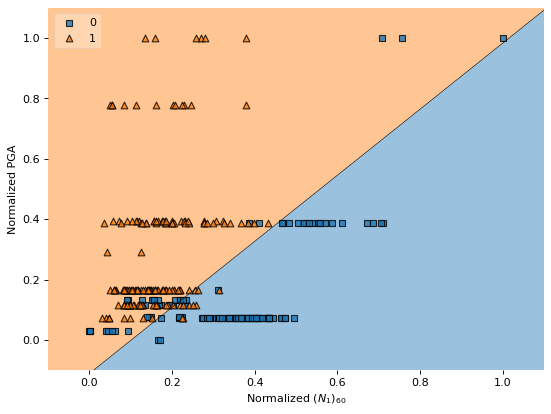

In [60]:
from mlxtend.plotting import plot_decision_regions
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plot_decision_regions(X=normalized_features, y=df['Liq'].to_numpy(), clf=pre_trained_model, legend=2)
# Define the y-axis range
axes = plt.axes()
axes.set_ylim([-0.1, 1.1])
axes.set_xlim([-0.1, 1.1])
plt.xlabel("Normalized $\it{{(N_1)}_{60}}$", size=10)
plt.ylabel("Normalized PGA", size=10)
plt.savefig("chi_chi_model_PGA_desicion_boundary.pdf")
plt.show()


<AxesSubplot:xlabel='PGA', ylabel='(N1)60'>

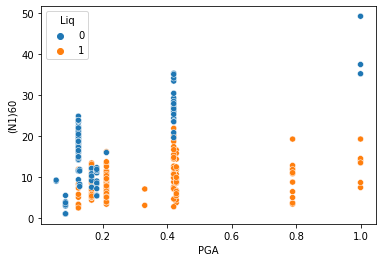

In [61]:
sn.scatterplot(x = features["PGA"], y =features["(N1)60"], hue = df['Liq'])